# Importing necessary packages

In [20]:
import pandas as pd # For handling the data

import seaborn as sns # For plotting
import matplotlib.pyplot as plt 
import plotly_express as px 

import numpy as np

# reading in the file


In [21]:
df = pd.read_excel("../Lab_Data/Covid19.xlsx", sheet_name="Veckodata Riket") # Using pandas read_excel function to read the data in excel
df2 = pd.read_excel("../Lab_Data/Covid19.xlsx", sheet_name="Veckodata Riket") # temporary for testing

## Initial Data Analisys

In [22]:
df.head(3) #  To get the 3 first just to see what the column names are and a bit of info och what the data looks like

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0


In [23]:
df.info() # Get relevant data och how many entries are null and what Data type they are
# No nulls, No objects in data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

In [24]:
df.describe() # Get useful data like max number in veckonumber is 53. 

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2020.957746,26.035211,18378.345070,177.197183,354.169014,1.125288e+06,10843.281690,67.176056,6000.464789,144.936620,14.000000,12321.154930,1187.840841
std,0.797809,14.228835,38569.455753,371.689114,725.677174,9.618084e+05,9265.100705,73.435000,3076.853993,173.659331,16.796551,6103.235009,587.255605
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,3075.000000,30.000000,59.750000,1.014860e+05,982.500000,14.000000,2643.750000,25.250000,2.425000,5880.000000,569.375000
50%,2021.000000,26.000000,5531.000000,53.000000,107.500000,1.085848e+06,10461.500000,27.500000,7559.500000,77.500000,7.450000,14610.500000,1407.650024
75%,2022.000000,37.750000,21125.000000,203.500000,421.250000,2.423603e+06,23350.500000,109.000000,8863.250000,185.500000,17.950000,17177.750000,1654.999969
max,2022.000000,53.000000,265043.000000,2554.000000,5024.000000,2.609725e+06,25144.000000,289.000000,9539.000000,664.000000,64.300003,20581.000000,1982.900024


In [25]:
df.isnull().sum() # No nulls.

år                                0
veckonummer                       0
Antal_fall_vecka                  0
Antal_fall_100000inv_vecka        0
Antal_fall_100000inv_14dagar      0
Kum_antal_fall                    0
Kum_fall_100000inv                0
Antal_nyaintensivvårdade_vecka    0
Kum_antal_intensivvårdade         0
Antal_avlidna_vecka               0
Antal_avlidna_milj_inv_vecka      0
Kum_antal_avlidna                 0
Kum_antal_avlidna_milj_inv        0
dtype: int64

# Combine Year and Veckonummer

In [26]:
df.insert(0, "Vecka", df["år"].astype(str) + "v" + df["veckonummer"].astype(str))
df.pop("år")
df.pop("veckonummer")

df.head()

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.0


## Plotting with Seaborn

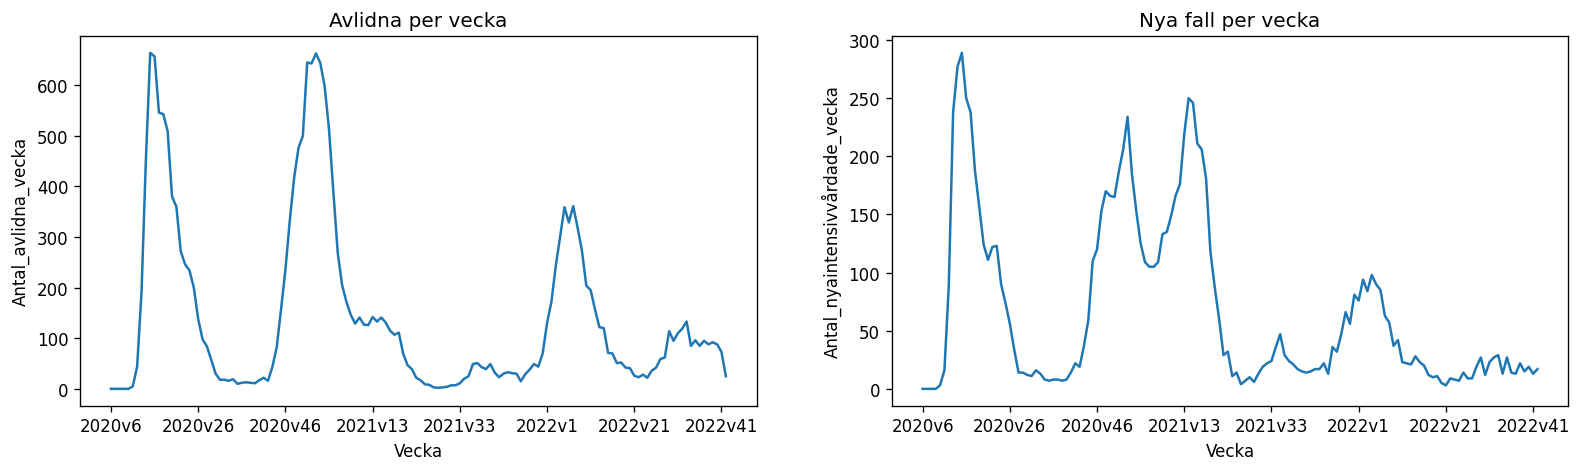

In [35]:
year = df["Vecka"]

fig, ax = plt.subplots(1,2, figsize = (16, 4), dpi = 120)

sns.lineplot(df, x = year, y = df["Antal_avlidna_vecka"], ax = ax[0, 0]) # Title is not informativ. Change later
sns.lineplot(df, x = year, y = df["Antal_nyaintensivvårdade_vecka"], ax = ax[0, 1]) # Same as above
ax[0, 0].xaxis.set_major_locator(plt.MaxNLocator(9))
ax[0, 1].xaxis.set_major_locator(plt.MaxNLocator(9))
ax[0].set(title="Avlidna per vecka")
ax[1].set(title="Nya fall per vecka");


In [ ]:
# Creating lists of necessary data
# 

# Function for plotting Seaborn Graphs

ValueError: Could not interpret value `Antal_fall` for parameter `y`

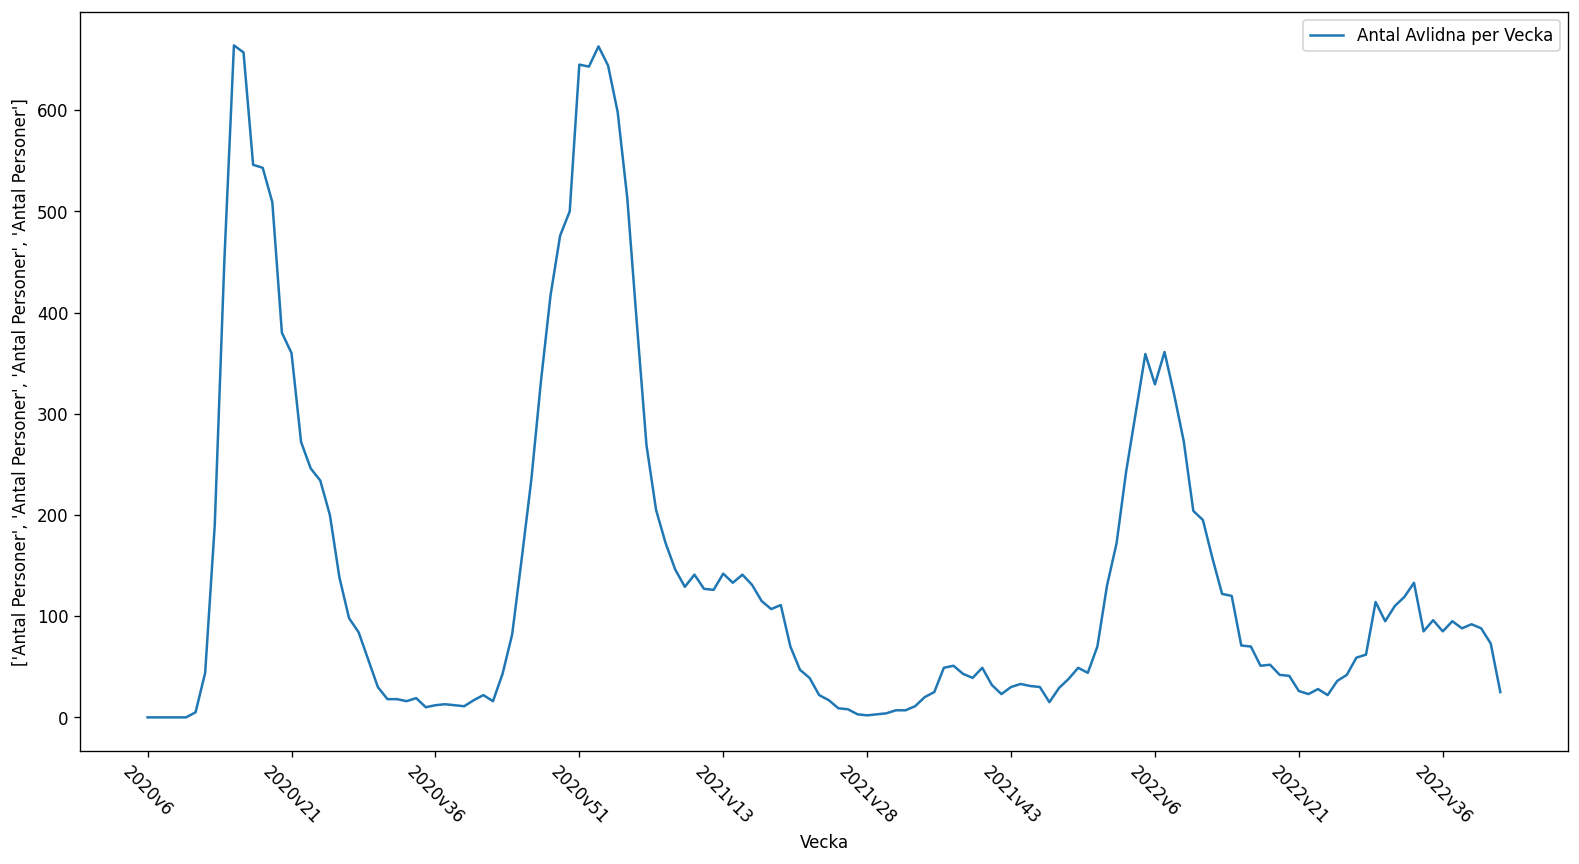

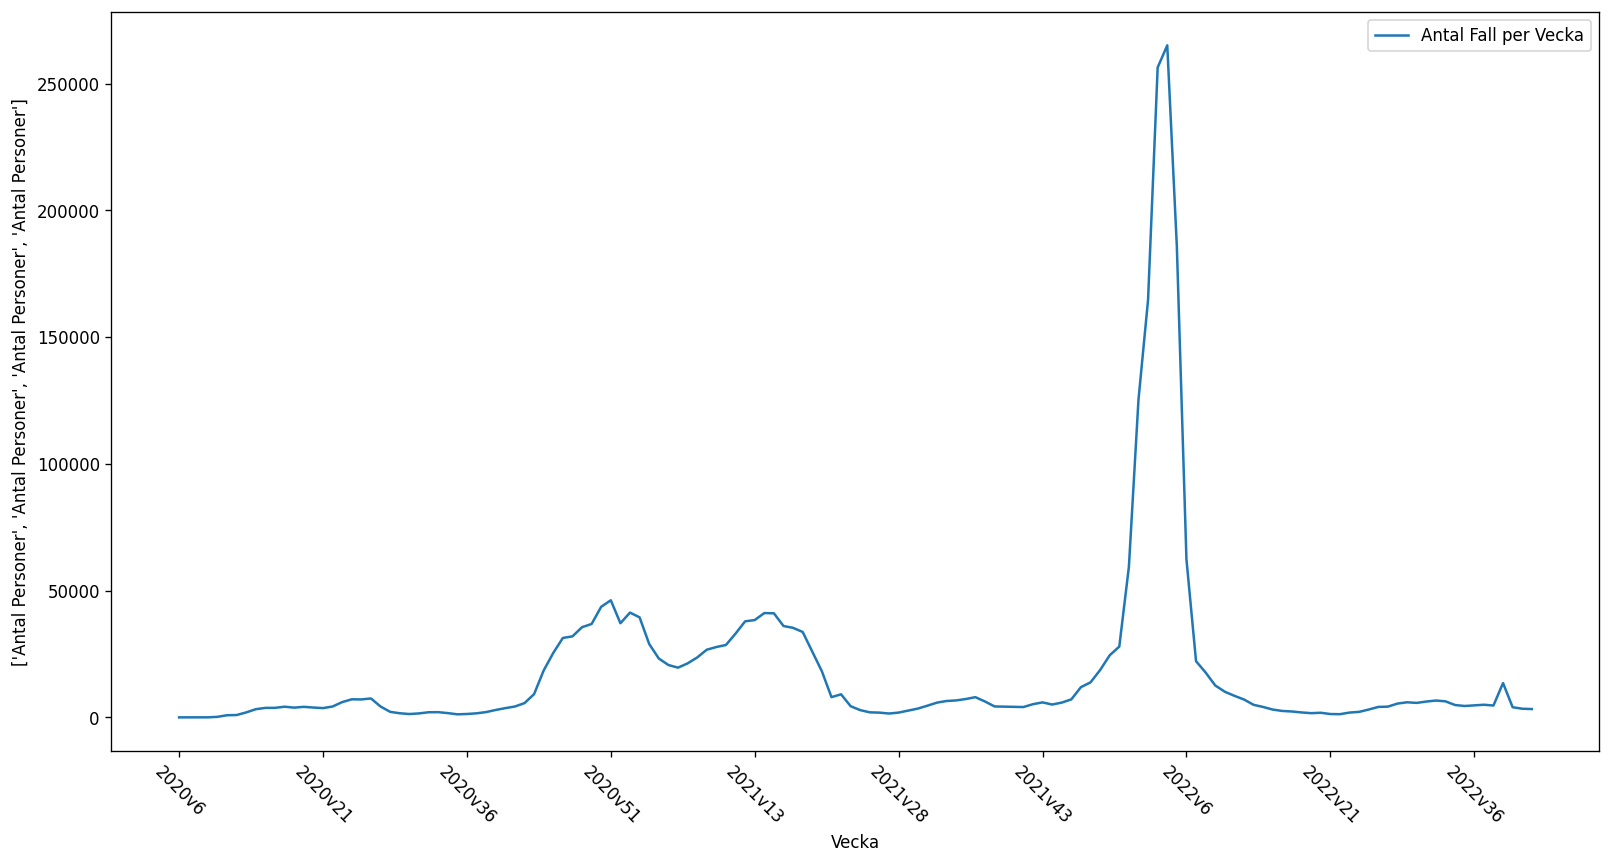

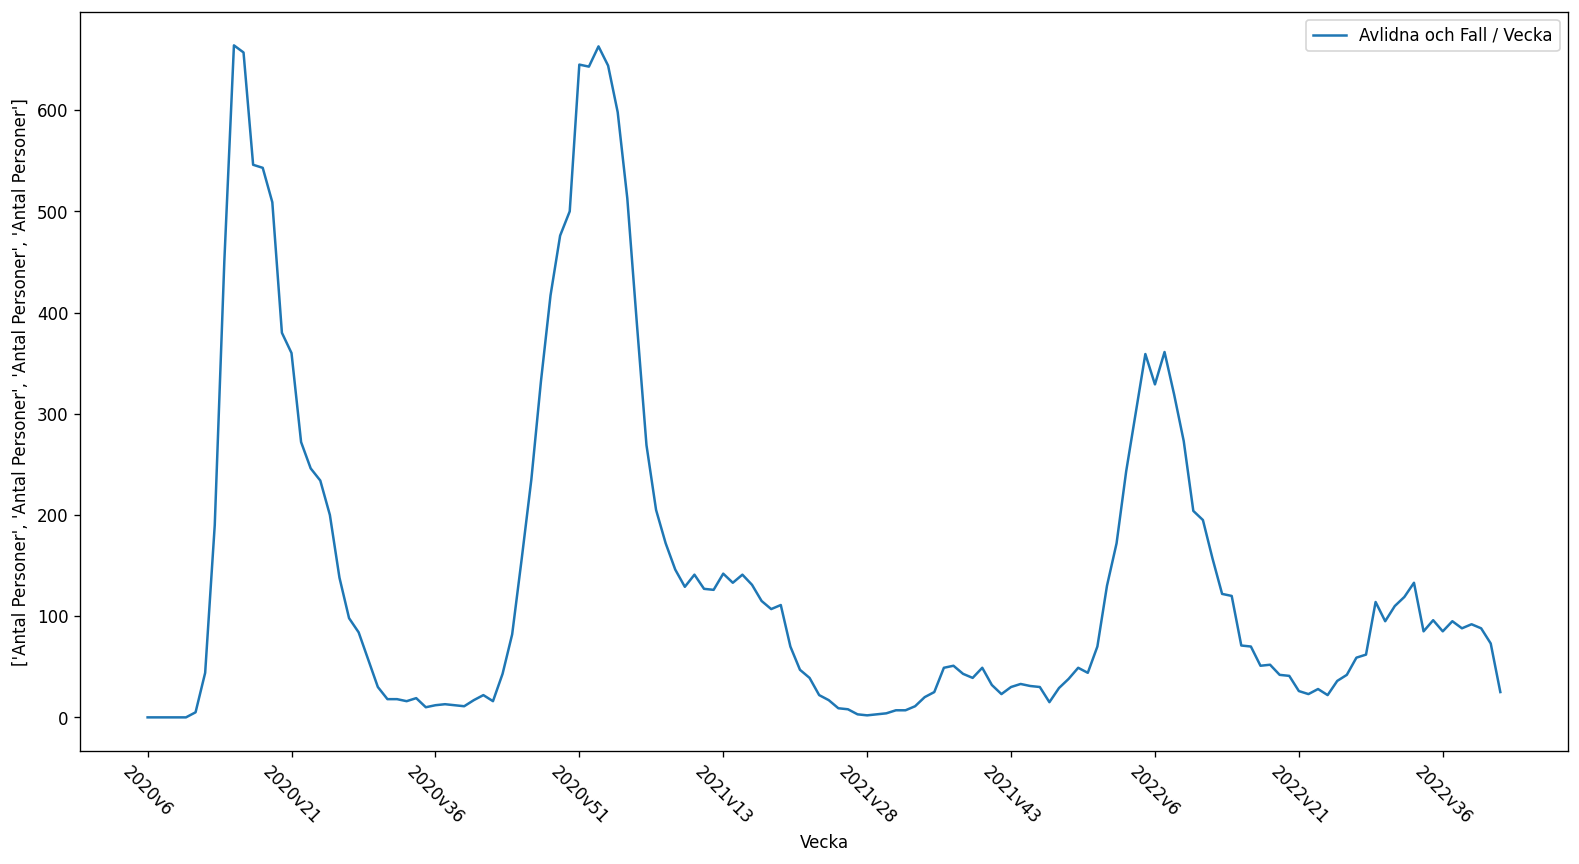

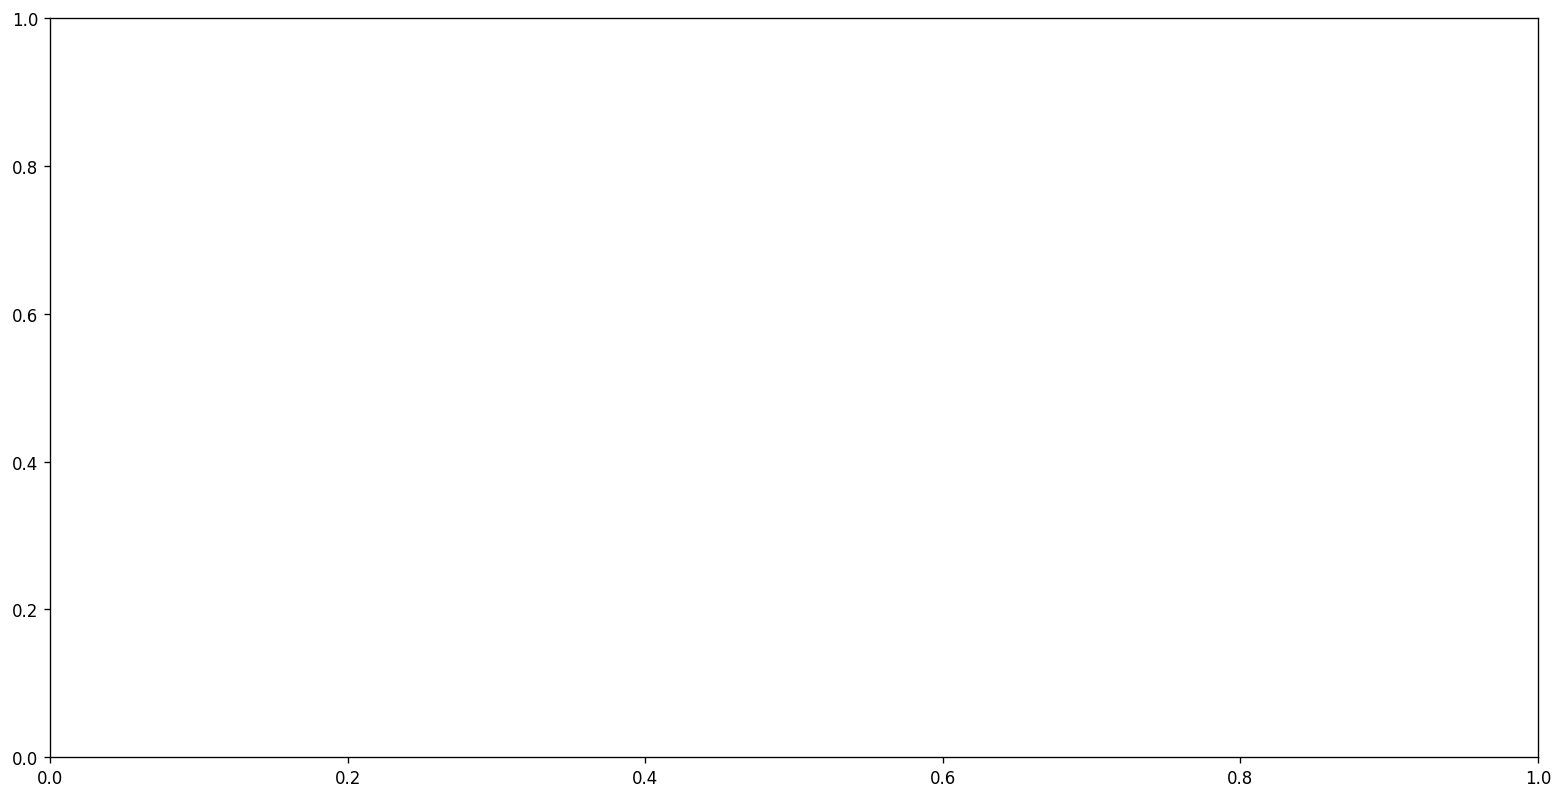

In [54]:
# Function for plotting seaborn graphs.
titles = [
    "Antal Avlidna per Vecka",
    "Antal Fall per Vecka",
    "Avlidna och Fall / Vecka",
    "Kumulativt Antal Fall",
]
datapoints = [
    "Antal_avlidna_vecka",
    "Antal_fall_vecka",
    "Antal_avlidna_vecka",
    "Antal_fall",
    "Kum_antal_fall",
]
y_label = ["Antal Personer"] * 4


def sns_plot_func(x, y, label, data):  # setting the function
    """Used to quickly plot with seaborn"""  # Docstring PLACEHOLDER
    fig, ax = plt.subplots(
        figsize=(16, 8), dpi=120
    )  # Subplot. TODO add actual subplots with ifstatement to check if list is >=2
    sns.lineplot(data=data, x=x, y=y, label=label)  # Plot code
    ax.xaxis.set_major_locator(
        plt.MaxNLocator(15)
    )  # Set major locator to not show all values on x.
    ax.xaxis.set_tick_params(rotation=-45)
    ax.set_ylabel(y_label)
    if (
        data[y].max() >= 10**6
    ):  # ifstatement to see if y data is above 1000000. if it is set yscale to logorithmic scale.
        ax.set_yscale("log")


#for axes, title, y_label in zip(ax.reshape(-1), titles, y_label):
for i in range(5):
    sns_plot_func(year, datapoints[i], titles[i], df)


4
4
['Antal_avlidna_vecka', 'Antal_fall_vecka', 'Antal_avlidna_vecka', 'Antal_fall', 'Kum_antal_fall']


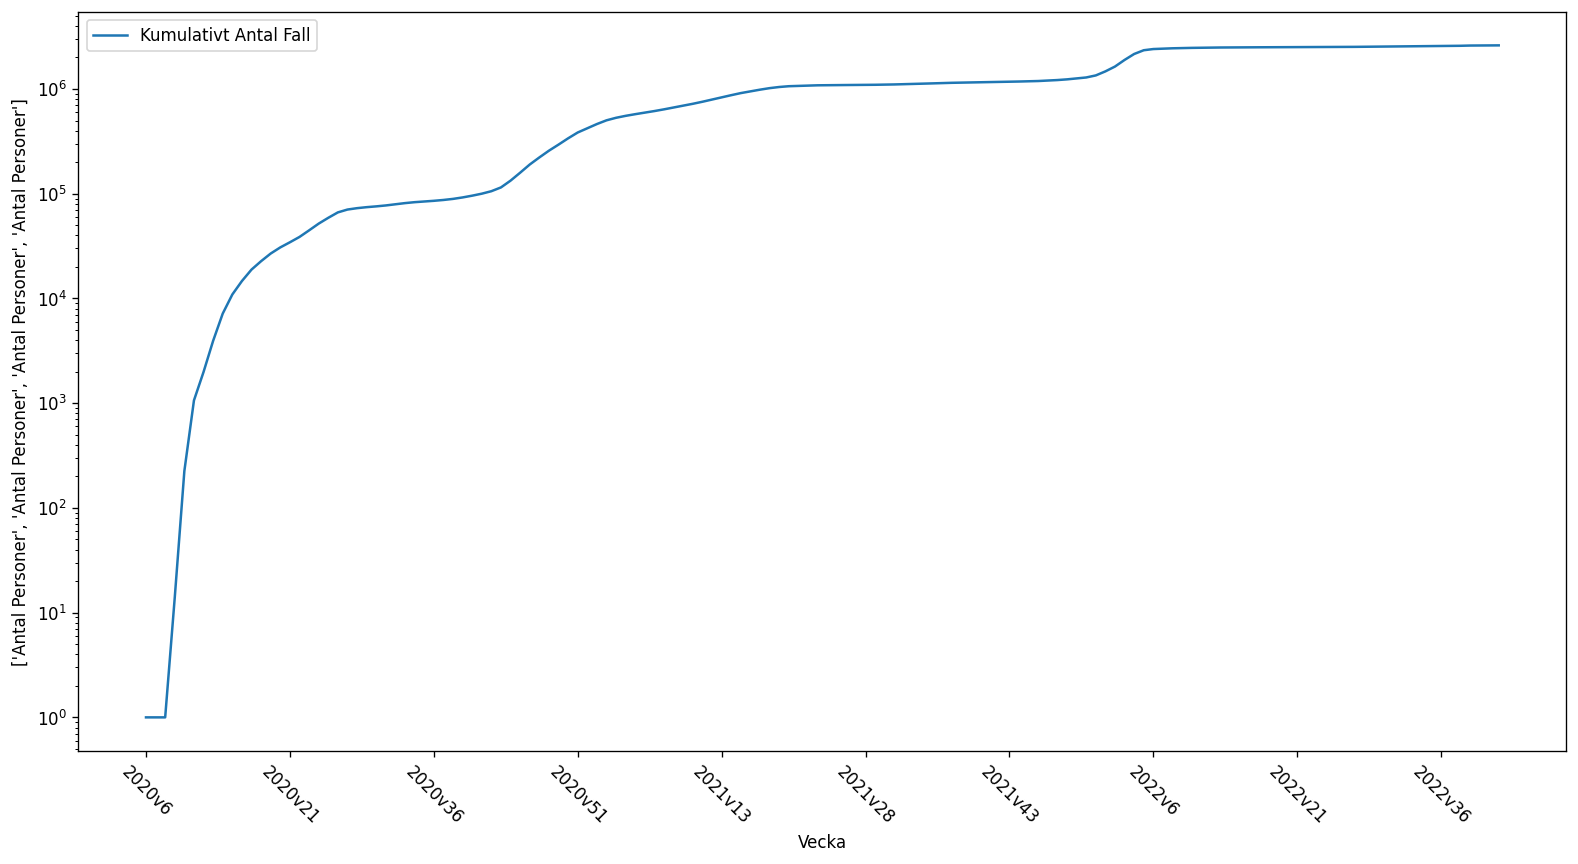

In [57]:
sns_plot_func(year, "Kum_antal_fall",titles[3], df)#, #sns_plot_func(year, "Antal_nyaintensivvårdade_vecka",df)
print(len(y_label))
print(len(titles))
print((datapoints))


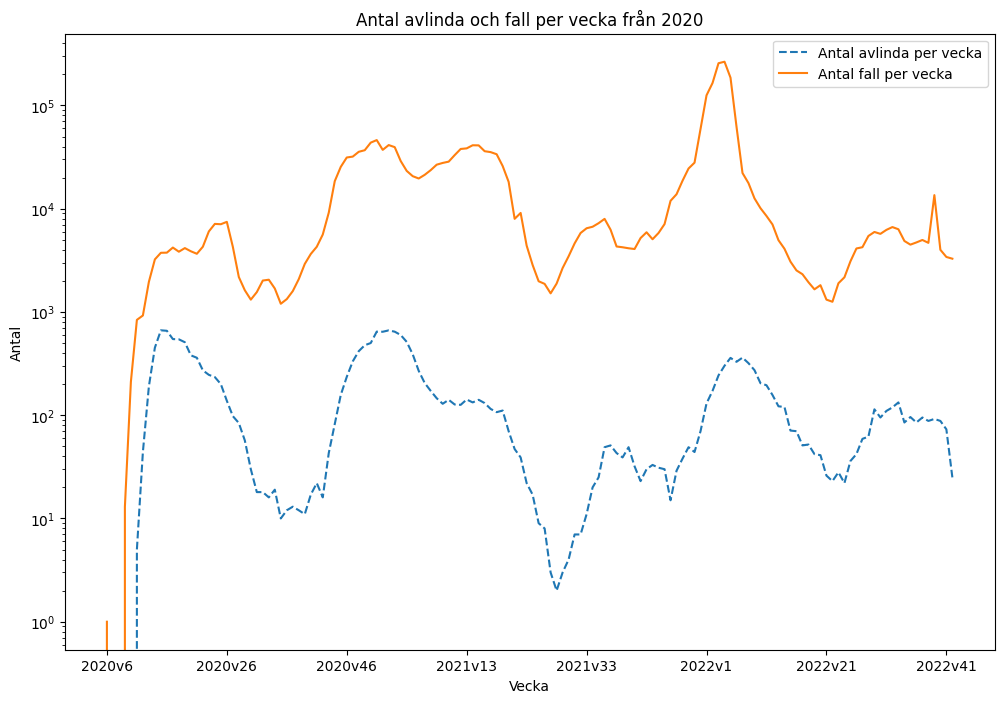

In [53]:
fig, ax = plt.subplots(figsize =(12,8)) # Sams code.Temporary for testing.
ax = sns.lineplot(x = "Vecka", y = "Antal_avlidna_vecka", data=df, label= "Antal avlinda per vecka", linestyle="dashed")
ax1 = sns.lineplot(x = "Vecka", y = "Antal_fall_vecka", data=df, label="Antal fall per vecka")
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set(xlabel = "Vecka", ylabel="Antal", title= "Antal avlinda och fall per vecka från 2020")
ax1.set_yscale('log')

#to fix scale 2 # https://www.geeksforgeeks.org/matplotlib-pyplot-twinx-in-python/



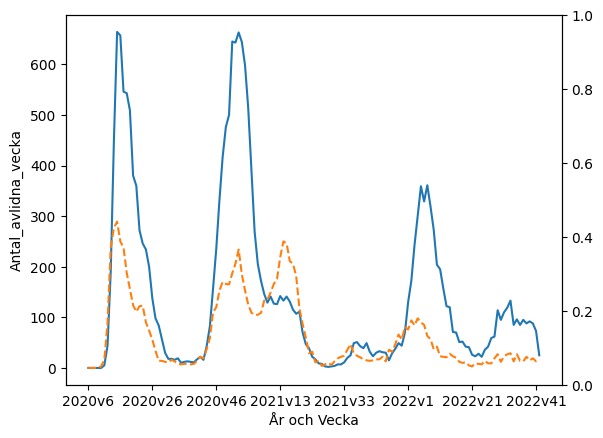

In [ ]:
sns.lineplot(df, x = year, y = df["Antal_avlidna_vecka"]).xaxis.set_major_locator(plt.MaxNLocator(9)) # Title is not informative. Change later
sns.lineplot(df, x = year, y = df["Antal_nyaintensivvårdade_vecka"], linestyle = "dashed").twinx();#.xaxis.set_major_locator(plt.MaxNLocator(9)) # Same as above

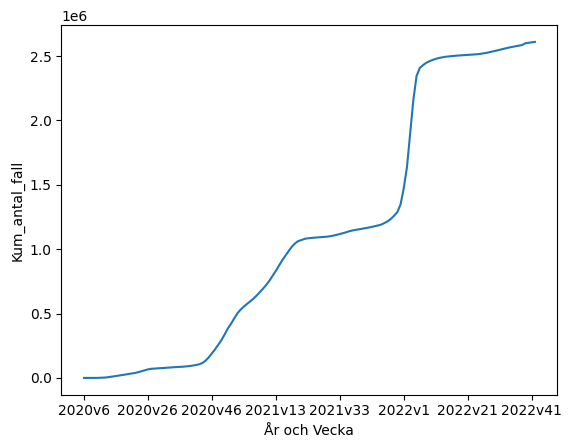

In [ ]:
# f) Rita linjediagram av kumulativt antal fall från 2020v6 till nu.

sns.lineplot(df, x = year, y = df["Kum_antal_fall"]).xaxis.set_major_locator(plt.MaxNLocator(9))

# Plotly express plotting C-F

In [65]:
px.line(df, x = "Vecka", y = "Antal_avlidna_vecka", title = "Antal Avldina per Vecka").update_layout(yaxis_title = "Antal Personer")


In [66]:
px.line(df, x = "Vecka", y = "Antal_fall_vecka", title = "Antal Fall per Vecka").update_layout(yaxis_title = "Antal Personer")

In [68]:
px.line(df, x = "Vecka", y = ["Antal_avlidna_vecka","Antal_fall_vecka"], title = "Antal Avlidna och Fall per Vecka").update_layout(yaxis_title = "Antal Personer")

In [69]:
px.line(df, x = "Vecka", y = "Kum_antal_fall", title = "Kumulativt Antal Fall per vecka").update_layout(yaxis_title = "Antal Personer")

# Sources:

## Data
- Data below attained at 2022-11-01 - 14:06
- https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/statistik-och-analyser/bekraftade-fall-i-sverige/
- https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/statistik-och-analyser/bekraftade-fall-i-sverige/